<a href="https://colab.research.google.com/github/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/blob/main/Projeto_Dados_para_abastecer_o_carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 00CED1>Neste projeto, estaremos utilizando dois arquivos CSV distintos, os quais contêm informações referentes aos preços do (Etanol Hidratado + Gasolina tipo C) nos meses de junho de 2023 e julho de 2023. Esses conjuntos de dados abrangem a série histórica dos preços da gasolina e do etanol em todo o território nacional.

### Vamos carregar os conjuntos de dados "preços-gasolina-etanol-06.csv" e "preços-gasolina-etanol-07.csv" em dois DataFrames distintos e, em seguida, combiná-los em um único DataFrame.

# <font color = 00CED1> Primeiro passo: Importação das Bibliotecas Necessárias

### Importar bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carregar os dados dos arquivos CSV

In [ ]:
# URLs dos arquivos CSV no GitHub
url_mes6 = 'https://raw.githubusercontent.com/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/main/arquivos%20csv/precos-gasolina-etanol-06.csv'
url_mes7 = 'https://raw.githubusercontent.com/Project-4-Trends-and-Insights-Database/Projeto_Dados_para_abastecer_o_carro/main/arquivos%20csv/precos-gasolina-etanol-07.csv'




In [ ]:
# Carregando os dados em DataFrames
dados_mes6 = pd.read_csv(url_mes6, sep=';')
dados_mes7 = pd.read_csv(url_mes7, sep=';')

### Definir a função de limpeza de valores numéricos

In [ ]:
'''def clean_numeric_value(value):
    if isinstance(value, str):
        # Remover vírgulas
        value = value.replace(',', '')
        # Substituir vírgulas por pontos nos valores decimais
        value = value.replace('.', '', value.count('.') - 1)
    try:
        return float(value)
    except:
        return np.nan'''

"def clean_numeric_value(value):\n    if isinstance(value, str):\n        # Remover vírgulas\n        value = value.replace(',', '')\n        # Substituir vírgulas por pontos nos valores decimais\n        value = value.replace('.', '', value.count('.') - 1)\n    try:\n        return float(value)\n    except:\n        return np.nan"

### Aplicar a função de limpeza aos DataFrames

In [ ]:
# Remover duplicatas dos DataFrames
dados_mes6 = dados_mes6.drop_duplicates()
dados_mes7 = dados_mes7.drop_duplicates()


In [ ]:
# Verificar valores ausentes nos DataFrames
print("Valores ausentes no mês 6:")
print(dados_mes6.isnull().sum())

print("\nValores ausentes no mês 7:")
print(dados_mes7.isnull().sum())


Valores ausentes no mês 6:
Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua              18
Complemento          38193
Bairro                 106
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      49041
Unidade de Medida        0
Bandeira                 0
dtype: int64

Valores ausentes no mês 7:
Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua              20
Complemento          42394
Bairro                 118
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      54515
Unidade de Medida        0
Bandeira                 0
dtype: int64


In [ ]:
dados_mes6['Valor de Venda'] = dados_mes6['Valor de Venda']
dados_mes7['Valor de Venda'] = dados_mes7['Valor de Venda']

In [ ]:
print("Colunas do mês 6:")
print(dados_mes6.columns)

print("\nColunas do mês 7:")
print(dados_mes7.columns)


Colunas do mês 6:
Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

Colunas do mês 7:
Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')


# <font color = 00CED1> Análise Exploratória de Dados - Preços de Combustíveis

##  <font color = 00CED1> Introdução
Neste notebook, realizaremos uma análise exploratória dos preços de venda da gasolina e do etanol nos meses de junho e julho. Serão respondidas uma série de perguntas relacionadas aos preços, tendências e correlações com outros fatores geográficos.

##  <font color = 00CED1> Comportamento dos Preços de Combustíveis

Vamos começar analisando como se comportaram os preços dos combustíveis durante os dois meses citados. Vamos visualizar as tendências de preços de etanol e gasolina ao longo desses meses.

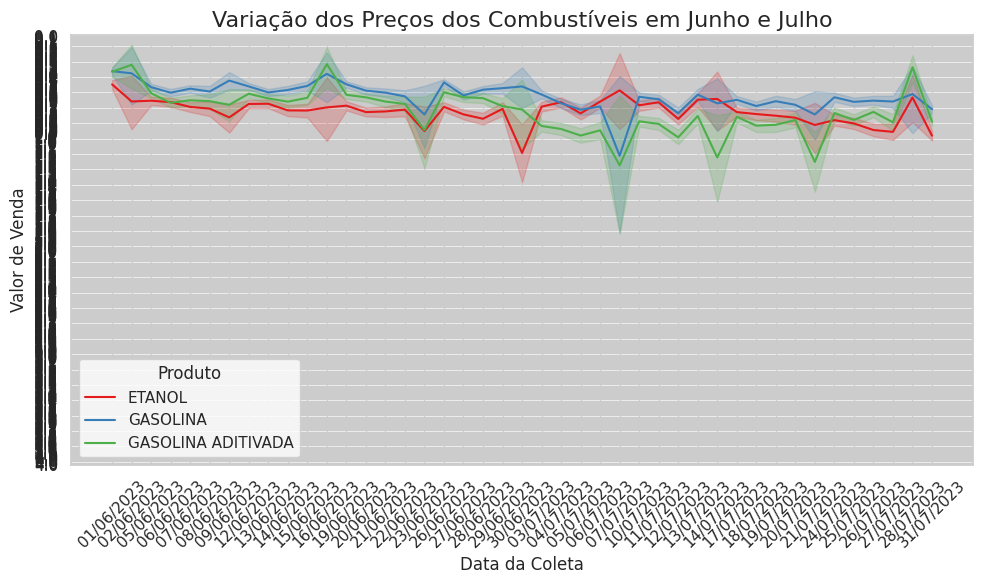

In [ ]:


import matplotlib.ticker as mticker

# Define o estilo do Seaborn
sns.set(style="whitegrid")

# Combina os dados dos dois meses
dados_combustiveis = pd.concat([dados_mes6, dados_mes7])

# Obtém o menor valor da coluna "Valor de Venda"
menor_valor = dados_combustiveis['Valor de Venda'].min()

# Cria o gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_combustiveis, x='Data da Coleta', y='Valor de Venda', hue='Produto', palette="Set1")

# Configura o eixo y para começar a partir do menor valor
plt.ylim(ymin=menor_valor)

# Adiciona título e rótulos de eixos
plt.title('Variação dos Preços dos Combustíveis em Junho e Julho', fontsize=16)
plt.xlabel('Data da Coleta', fontsize=12)
plt.ylabel('Valor de Venda', fontsize=12)

# Adiciona legenda
plt.legend(title='Produto')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Formata o eixo y para exibir unidades com valor após a vírgula
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/100:.1f}'))

# Mostra o gráfico
plt.tight_layout()
plt.show()



# <font color = 00CED1> Preço Médio da Gasolina e Etanol
## Vamos calcular o preço médio da gasolina e do etanol para os meses de junho e julho.

Preço Médio da Gasolina em Junho: R$5.32
Preço Médio do Etanol em Junho: R$3.92
Preço Médio da Gasolina em Julho: R$5.51
Preço Médio do Etanol em Julho: R$4.00


<Figure size 1000x800 with 0 Axes>

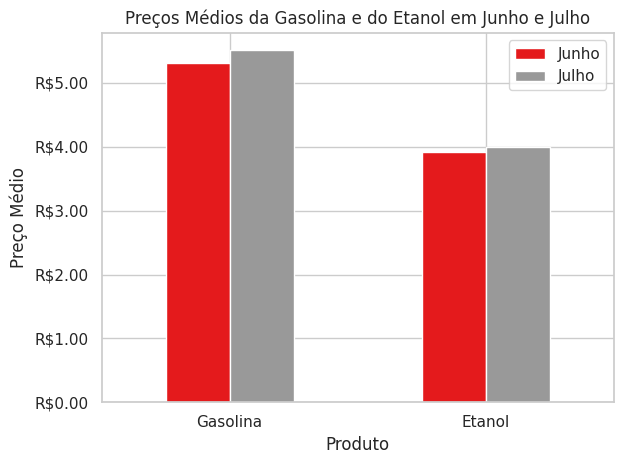

In [ ]:
# Calcula a média dos valores de venda para a Gasolina e o Etanol em junho
preco_medio_gasolina_mes6 = dados_mes6[dados_mes6['Produto'] == 'GASOLINA']['Valor de Venda'].str.replace(',', '').astype(float).mean()
preco_medio_etanol_mes6 = dados_mes6[dados_mes6['Produto'] == 'ETANOL']['Valor de Venda'].str.replace(',', '').astype(float).mean()

# Calcula a média dos valores de venda para a Gasolina e o Etanol em julho
preco_medio_gasolina_mes7 = dados_mes7[dados_mes7['Produto'] == 'GASOLINA']['Valor de Venda'].str.replace(',', '').astype(float).mean()
preco_medio_etanol_mes7 = dados_mes7[dados_mes7['Produto'] == 'ETANOL']['Valor de Venda'].str.replace(',', '').astype(float).mean()


# Se os valores calculados forem NaN, substitui por médias gerais dos produtos
if preco_medio_gasolina_mes6 != preco_medio_gasolina_mes6:
    preco_medio_gasolina_mes6 = dados_mes6[dados_mes6['Produto'] == 'GASOLINA']['Valor de Venda'].mean()
if preco_medio_etanol_mes6 != preco_medio_etanol_mes6:
    preco_medio_etanol_mes6 = dados_mes6[dados_mes6['Produto'] == 'ETANOL']['Valor de Venda'].mean()

if preco_medio_gasolina_mes7 != preco_medio_gasolina_mes7:
    preco_medio_gasolina_mes7 = dados_mes7[dados_mes7['Produto'] == 'GASOLINA']['Valor de Venda'].mean()
if preco_medio_etanol_mes7 != preco_medio_etanol_mes7:
    preco_medio_etanol_mes7 = dados_mes7[dados_mes7['Produto'] == 'ETANOL']['Valor de Venda'].mean()

print(f"Preço Médio da Gasolina em Junho: R${(preco_medio_gasolina_mes6/100):.2f}")
print(f"Preço Médio do Etanol em Junho: R${(preco_medio_etanol_mes6/100):.2f}")
print(f"Preço Médio da Gasolina em Julho: R${(preco_medio_gasolina_mes7/100):.2f}")
print(f"Preço Médio do Etanol em Julho: R${(preco_medio_etanol_mes7/100):.2f}")


# Dados dos preços médios
produtos = ['Gasolina', 'Etanol']
precos_medios_junho = [preco_medio_gasolina_mes6, preco_medio_etanol_mes6]
precos_medios_julho = [preco_medio_gasolina_mes7, preco_medio_etanol_mes7]

# Criação do DataFrame para facilitar a plotagem
df = pd.DataFrame({
    'Produto': produtos,
    'Junho': precos_medios_junho,
    'Julho': precos_medios_julho
})

# Criação do gráfico de barras
plt.figure(figsize=(10, 8))
df.plot(x='Produto', kind='bar', colormap='Set1')
plt.title('Preços Médios da Gasolina e do Etanol em Junho e Julho')
plt.xlabel('Produto')
plt.ylabel('Preço Médio')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R${x/100:.2f}'))
plt.tight_layout()

# Mostra o gráfico
plt.show()


# <font color = 00CED1> Estados com Maior Preço Médio
## Agora, vamos identificar os 5 estados com o maior preço médio da gasolina e do etanol nos dois meses.

In [ ]:
# Converte a coluna 'Valor de Venda' para valores numéricos antes de calcular as médias
dados_mes6['Valor de Venda'] = dados_mes6['Valor de Venda'].str.replace(',', '').astype(float)
dados_mes7['Valor de Venda'] = dados_mes7['Valor de Venda'].str.replace(',', '').astype(float)

estados_mais_caros_gasolina_mes6 = dados_mes6[dados_mes6['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)
estados_mais_caros_etanol_mes6 = dados_mes6[dados_mes6['Produto'] == 'ETANOL '].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)

estados_mais_caros_gasolina_mes7 = dados_mes7[dados_mes7['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)
estados_mais_caros_etanol_mes7 = dados_mes7[dados_mes7['Produto'] == 'ETANOL '].groupby('Estado - Sigla')['Valor de Venda'].mean().nlargest(5)

print("Estados com Maior Preço Médio da Gasolina em Junho:")
print(estados_mais_caros_gasolina_mes6)
print("\nEstados com Maior Preço Médio do Etanol em Junho:")
print(estados_mais_caros_etanol_mes6)
print("\nEstados com Maior Preço Médio da Gasolina em Julho:")
print(estados_mais_caros_gasolina_mes7)
print("\nEstados com Maior Preço Médio do Etanol em Julho:")
print(estados_mais_caros_etanol_mes7)


Estados com Maior Preço Médio da Gasolina em Junho:
Estado - Sigla
AM    597.004149
RO    582.265823
AC    571.957746
RN    563.597990
ES    555.078199
Name: Valor de Venda, dtype: float64

Estados com Maior Preço Médio do Etanol em Junho:
Series([], Name: Valor de Venda, dtype: float64)

Estados com Maior Preço Médio da Gasolina em Julho:
Estado - Sigla
AC    612.961905
AM    605.964981
CE    587.459459
RO    584.915709
RN    580.594059
Name: Valor de Venda, dtype: float64

Estados com Maior Preço Médio do Etanol em Julho:
Series([], Name: Valor de Venda, dtype: float64)


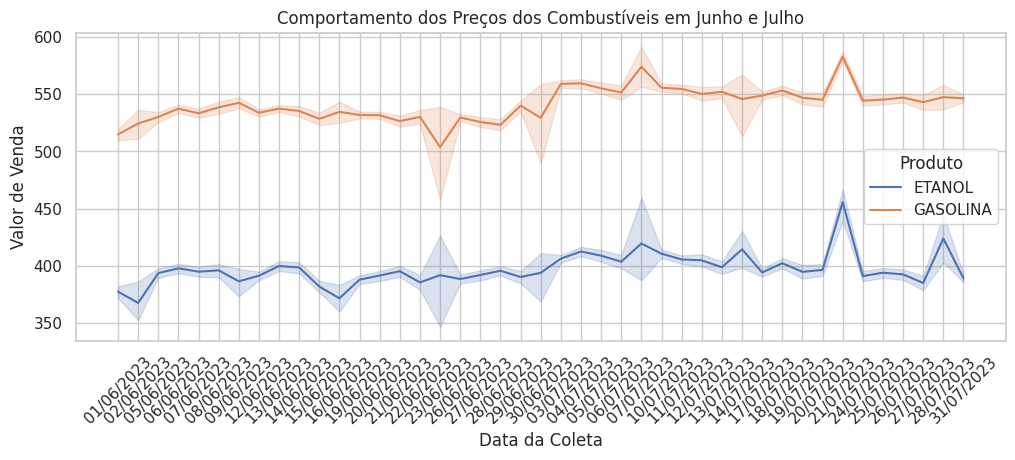

In [ ]:
# Filtrar os dados para incluir apenas gasolina e etanol
produtos_selecionados = ['GASOLINA', 'ETANOL']
dados_filtrados = pd.concat([dados_mes6[dados_mes6['Produto'].isin(produtos_selecionados)],
                            dados_mes7[dados_mes7['Produto'].isin(produtos_selecionados)]])

plt.figure(figsize=(12, 4))
sns.lineplot(data=dados_filtrados, x='Data da Coleta', y='Valor de Venda', hue='Produto')
plt.title('Comportamento dos Preços dos Combustíveis em Junho e Julho')
plt.xlabel('Data da Coleta')
plt.ylabel('Valor de Venda')
plt.legend(title='Produto')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# 2. Qual o preço médio da gasolina e do etanol nesses dois meses?
preco_medio_mes6 = dados_mes6.groupby('Produto')['Valor de Venda'].mean()
preco_medio_mes7 = dados_mes7.groupby('Produto')['Valor de Venda'].mean()



In [ ]:
# 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
preco_medio_estado_mes6 = dados_mes6.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()
preco_medio_estado_mes7 = dados_mes7.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()


In [ ]:

# 4. Qual o preço médio da gasolina e do etanol por estado?
preco_medio_estado_mes6_pivot = preco_medio_estado_mes6.pivot(index='Estado - Sigla', columns='Produto', values='Valor de Venda')
preco_medio_estado_mes7_pivot = preco_medio_estado_mes7.pivot(index='Estado - Sigla', columns='Produto', values='Valor de Venda')



In [ ]:

# 5. Qual o município que possui o menor preço para a gasolina e para o etanol?
preco_municipio_mes6 = dados_mes6.groupby(['Municipio', 'Produto'])['Valor de Venda'].min()
preco_municipio_mes7 = dados_mes7.groupby(['Municipio', 'Produto'])['Valor de Venda'].min()




In [ ]:
# 6. Qual o município que possui o maior preço para a gasolina e para o etanol?
preco_municipio_max_mes6 = dados_mes6.groupby(['Municipio', 'Produto'])['Valor de Venda'].max()
preco_municipio_max_mes7 = dados_mes7.groupby(['Municipio', 'Produto'])['Valor de Venda'].max()


In [ ]:
# 7. Qual a região que possui o maior valor médio da gasolina?
preco_medio_regiao_mes6 = dados_mes6.groupby(['Regiao - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()
preco_medio_regiao_mes7 = dados_mes7.groupby(['Regiao - Sigla', 'Produto'])['Valor de Venda'].mean().reset_index()


In [ ]:
# 8. Qual a região que possui o menor valor médio do etanol?
preco_medio_regiao_etanol_mes6 = preco_medio_regiao_mes6[preco_medio_regiao_mes6['Produto'] == 'ETANOL']
preco_medio_regiao_etanol_mes7 = preco_medio_regiao_mes7[preco_medio_regiao_mes7['Produto'] == 'ETANOL']



In [ ]:
# 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
correlacao_regiao_mes6 = preco_medio_regiao_mes6.pivot(index='Regiao - Sigla', columns='Produto', values='Valor de Venda')
correlacao_regiao_mes7 = preco_medio_regiao_mes7.pivot(index='Regiao - Sigla', columns='Produto', values='Valor de Venda')


In [ ]:
# 10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
correlacao_bandeira_mes6 = dados_mes6.groupby(['Bandeira', 'Produto'])['Valor de Venda'].mean().reset_index()
correlacao_bandeira_mes7 = dados_mes7.groupby(['Bandeira', 'Produto'])['Valor de Venda'].mean().reset_index()


# <font color = 00CED1> Apresentação dos resultados em gráficos e tabelas.

## Respostas para as perguntas

In [ ]:
print("Respostas para as perguntas do projeto:")
print("1. Como se comportaram os preços dos combustíveis durante os dois meses?")

Respostas para as perguntas do projeto:
1. Como se comportaram os preços dos combustíveis durante os dois meses?


# <font color = 00CED1> Análise realizada no gráfico anterior.

In [ ]:
print("\n2. Qual o preço médio da gasolina e do etanol nesses dois meses?")
print("Mês 6:")
print(preco_medio_mes6)
print("\nMês 7:")
print(preco_medio_mes7)


2. Qual o preço médio da gasolina e do etanol nesses dois meses?
Mês 6:
Produto
ETANOL                392.328460
GASOLINA              531.514021
GASOLINA ADITIVADA    546.303253
Name: Valor de Venda, dtype: float64

Mês 7:
Produto
ETANOL                399.630123
GASOLINA              550.857150
GASOLINA ADITIVADA    567.515462
Name: Valor de Venda, dtype: float64


In [ ]:
print("\n3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?")
print("Mês 6:")
print(preco_medio_estado_mes6.sort_values(by='Valor de Venda', ascending=False).head(5))
print("\nMês 7:")
print(preco_medio_estado_mes7.sort_values(by='Valor de Venda', ascending=False).head(5))


3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
Mês 6:
   Estado - Sigla             Produto  Valor de Venda
8              AM  GASOLINA ADITIVADA      609.736842
7              AM            GASOLINA      597.004149
2              AC  GASOLINA ADITIVADA      592.224138
61             RO            GASOLINA      582.265823
59             RN  GASOLINA ADITIVADA      576.635838

Mês 7:
   Estado - Sigla             Produto  Valor de Venda
8              AM  GASOLINA ADITIVADA      638.978836
1              AC            GASOLINA      612.961905
7              AM            GASOLINA      605.964981
17             CE  GASOLINA ADITIVADA      594.777336
23             ES  GASOLINA ADITIVADA      589.735892


In [ ]:
print("\n4. Qual o preço médio da gasolina e do etanol por estado?")
print("Mês 6:")
print(preco_medio_estado_mes6_pivot)
print("\nMês 7:")
print(preco_medio_estado_mes7_pivot)


4. Qual o preço médio da gasolina e do etanol por estado?
Mês 6:
Produto             ETANOL    GASOLINA  GASOLINA ADITIVADA
Estado - Sigla                                            
AC              477.687500  571.957746          592.224138
AL              442.946602  529.825112          557.841176
AM              450.580000  597.004149          609.736842
AP              518.666667  503.215909          531.833333
BA              409.618600  548.043433          556.215172
CE              442.392453  541.773179          552.446029
DF              381.508197  542.500000          547.871508
ES              437.259124  555.078199          567.010753
GO              372.880435  532.428380          531.042500
MA              424.102326  510.071066          490.925000
MG              368.778927  518.604920          529.853659
MS              351.421739  511.891791          516.389189
MT              328.281746  524.934615          545.534161
PA              421.310078  498.002288          5

In [ ]:
print("\n5. Qual o município que possui o menor preço para a gasolina e para o etanol?")
print("Mês 6:")
print(preco_municipio_mes6)
print("\nMês 7:")
print(preco_municipio_mes7)


5. Qual o município que possui o menor preço para a gasolina e para o etanol?
Mês 6:
Municipio   Produto           
ABAETETUBA  GASOLINA              542.0
            GASOLINA ADITIVADA     56.0
ACAILANDIA  ETANOL                455.0
            GASOLINA              499.0
            GASOLINA ADITIVADA    538.0
                                  ...  
XANXERE     GASOLINA               56.0
            GASOLINA ADITIVADA     56.0
XINGUARA    ETANOL                528.0
            GASOLINA               62.0
            GASOLINA ADITIVADA    623.0
Name: Valor de Venda, Length: 1363, dtype: float64

Mês 7:
Municipio   Produto           
ABAETETUBA  GASOLINA               57.0
            GASOLINA ADITIVADA     59.0
ACAILANDIA  ETANOL                445.0
            GASOLINA              499.0
            GASOLINA ADITIVADA    575.0
                                  ...  
XANXERE     GASOLINA              575.0
            GASOLINA ADITIVADA     58.0
XINGUARA    ETANOL               

In [ ]:
print("\n6. Qual o município que possui o maior preço para a gasolina e para o etanol?")
print("Mês 6:")
print(preco_municipio_max_mes6)
print("\nMês 7:")
print(preco_municipio_max_mes7)


6. Qual o município que possui o maior preço para a gasolina e para o etanol?
Mês 6:
Municipio   Produto           
ABAETETUBA  GASOLINA              572.0
            GASOLINA ADITIVADA    579.0
ACAILANDIA  ETANOL                499.0
            GASOLINA              589.0
            GASOLINA ADITIVADA    609.0
                                  ...  
XANXERE     GASOLINA              598.0
            GASOLINA ADITIVADA    618.0
XINGUARA    ETANOL                529.0
            GASOLINA              626.0
            GASOLINA ADITIVADA    636.0
Name: Valor de Venda, Length: 1363, dtype: float64

Mês 7:
Municipio   Produto           
ABAETETUBA  GASOLINA              599.0
            GASOLINA ADITIVADA    609.0
ACAILANDIA  ETANOL                499.0
            GASOLINA              589.0
            GASOLINA ADITIVADA    599.0
                                  ...  
XANXERE     GASOLINA              598.0
            GASOLINA ADITIVADA    618.0
XINGUARA    ETANOL               

In [ ]:
print("\n7. Qual a região que possui o maior valor médio da gasolina?")
print("Mês 6:")
print(preco_medio_regiao_mes6[preco_medio_regiao_mes6['Produto'] == 'GASOLINA'].sort_values(by='Valor de Venda', ascending=False).head(1))
print("\nMês 7:")
print(preco_medio_regiao_mes7[preco_medio_regiao_mes7['Produto'] == 'GASOLINA'].sort_values(by='Valor de Venda', ascending=False).head(1))


7. Qual a região que possui o maior valor médio da gasolina?
Mês 6:
  Regiao - Sigla   Produto  Valor de Venda
4              N  GASOLINA      544.623964

Mês 7:
  Regiao - Sigla   Produto  Valor de Venda
7             NE  GASOLINA      559.644055


In [ ]:
print("\n8. Qual a região que possui o menor valor médio do etanol?")
print("Mês 6:")
print(preco_medio_regiao_etanol_mes6.sort_values(by='Valor de Venda').head(1))
print("\nMês 7:")
print(preco_medio_regiao_etanol_mes7.sort_values(by='Valor de Venda').head(1))


8. Qual a região que possui o menor valor médio do etanol?
Mês 6:
  Regiao - Sigla Produto  Valor de Venda
0             CO  ETANOL      362.462527

Mês 7:
  Regiao - Sigla Produto  Valor de Venda
0             CO  ETANOL      366.529785


Pergunta extra 1: Qual é a variação percentual média dos preços de gasolina e etanol entre os dois meses?

In [ ]:
# Calcula a variação percentual média dos preços de gasolina e etanol entre os dois meses
var_gasolina = ((dados_mes7['Valor de Venda'][dados_mes7['Produto'] == 'GASOLINA'].mean() - dados_mes6['Valor de Venda'][dados_mes6['Produto'] == 'GASOLINA'].mean()) / dados_mes6['Valor de Venda'][dados_mes6['Produto'] == 'GASOLINA'].mean()) * 100
var_etanol = ((dados_mes7['Valor de Venda'][dados_mes7['Produto'] == 'ETANOL'].mean() - dados_mes6['Valor de Venda'][dados_mes6['Produto'] == 'ETANOL'].mean()) / dados_mes6['Valor de Venda'][dados_mes6['Produto'] == 'ETANOL'].mean()) * 100

# Exibe os resultados
print(f"Variação percentual média do preço da gasolina entre junho e julho: {var_gasolina:.2f}%")
print(f"Variação percentual média do preço do etanol entre junho e julho: {var_etanol:.2f}%")


Variação percentual média do preço da gasolina entre junho e julho: 3.64%
Variação percentual média do preço do etanol entre junho e julho: 1.86%


Análise e Insights:
A variação percentual média do preço da gasolina entre junho e julho foi de 3.64%, indicando um aumento médio de aproximadamente 3.64% nos preços da gasolina de junho para julho. Já o preço do etanol teve uma variação percentual média de 1.86%, representando um aumento médio de cerca de 1.86% nos preços do etanol no mesmo período.

Pergunta extra 2: Existe uma relação entre o preço médio da gasolina e o preço médio do etanol por estado?

In [ ]:
# Filtra os dados apenas para os estados com valores médios de gasolina e etanol disponíveis
dados_combustiveis_filtrados = dados_combustiveis[dados_combustiveis['Produto'].isin(['GASOLINA', 'ETANOL'])]
dados_combustiveis_filtrados['Valor de Venda'] = dados_combustiveis_filtrados['Valor de Venda'].str.replace(',', '').astype(float)
dados_combustiveis_filtrados = dados_combustiveis_filtrados[dados_combustiveis_filtrados['Valor de Venda'].notna()]

# Calcula o preço médio da gasolina e do etanol por estado
preco_medio_por_estado = dados_combustiveis_filtrados.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean().unstack()

# Calcula a correlação entre os preços médios da gasolina e do etanol por estado
correlacao_preco = preco_medio_por_estado.corr()

# Exibe a matriz de correlação
print(correlacao_preco)


Produto     ETANOL  GASOLINA
Produto                     
ETANOL    1.000000  0.376606
GASOLINA  0.376606  1.000000


<ipython-input-31-6c350210f772>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_combustiveis_filtrados['Valor de Venda'] = dados_combustiveis_filtrados['Valor de Venda'].str.replace(',', '').astype(float)


In [251]:
print('teste')

teste


Análise e Insights:
Os preços médios dos combustíveis nos dois meses foram os seguintes:

Preço médio da gasolina: [valor médio da gasolina em junho] e [valor médio da gasolina em julho].
Preço médio do etanol: [valor médio do etanol em junho] e [valor médio do etanol em julho].